## Segmentation Project

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt
import warnings
%matplotlib inline

Data from SQL query. Data uploaded to google drive.

In [48]:
dat = pd.read_csv('data for segmentation_130519.csv') #from file where the data is kept.
print(dat.shape)
head(dat)

(123587, 167)


,eval_date,pid,pid_age,cross_platform,current_sub_length,current_sub_rank,price_per_term,paypal,credit_card,direct_debit,...,occupation_skilled_manual_worker,occupation_self_employed,occupation_housewife,children_at_home,has_stocks_and_shares,isba_desc,financial_acorn_type_desc,acorn_type_desc,ts_number,postcode
0,08/05/2019,000068d2-5ce0-4b19-9832-8884568391be,601,0,-601.0,1.0,95.37,0,1,0,...,-1,-1,-1,-1,-1,NaN,NaN,NaN,TS2601020,NaN
1,08/05/2019,0000883f-9856-413c-9e32-af6e351470e5,85,0,-71.0,1.0,104.04,0,1,0,...,-1,-1,-1,-1,-1,London,"Young welloff private renters, less financiall...",Business areas without resident population,TS5781221,WC1V 6PX
2,08/05/2019,00008fcd-031a-4b8e-abf6-c98ba9e04179,45,0,-31.0,1.0,104.04,0,1,0,...,0,1,0,1,1,Wales and the West,"Older professional families, spending and inve...",Wealthy countryside commuters,TS6075007,SN15 5PH
3,08/05/2019,0000d39c-81af-4364-b636-7f87ae1f982f,196,0,-196.0,2.0,80.00,0,1,0,...,0,0,0,0,1,Lancashire,"Wealthiest middleaged couples, many investments",Wealthy countryside commuters,TS2064416,CH60 9HR
4,08/05/2019,0001c9df-ea30-4295-86b7-f0d4790b5621,198,1,-198.0,1.0,0.00,0,0,0,...,0,0,0,0,1,Southern,"Wealthiest middleaged couples, many investments",Large house luxury,TS1375429,RH1 4JJ


### Missing Values

In [49]:
dat.drop(columns={'eval_date', 'pid'}, inplace=True)
pd.set_option('display.max_rows', 500)
pd.DataFrame(dat.isnull().sum(), columns=['Missing Values']) #checking for total null values

,Missing Values
pid_age,0
cross_platform,0
current_sub_length,74
current_sub_rank,74
price_per_term,186
paypal,0
credit_card,0
direct_debit,0
annual,0
monthly,0


### Columns to Select

Filling na values with 0. Previous investigation found that device type was too dominant in the segmentation so the remaining variables were chosen for building the segmentation.

In [50]:
dat_num = dat.fillna(0)
dat_num = dat_num[[
 'cross_platform',
 'current_sub_length',
 'current_sub_rank',
 'price_per_term',
 'paypal',
 'credit_card',
 'direct_debit',
 'annual',
 'monthly',
 'weekday_prop',
 'weekend_prop',
 'lan_wifi_prop',
 'mob_prop',
 'days_since_last_seen',
 'visit_week',
 'pv_week',
 'pv_premium',
 'prop_premium_pv',
 'story_types_total',
 'Politics_pv',
 'Sport_pv',
 'News_pv',
 'Business_pv',
 'Lifestyle_pv',
 'Other_pv',
 'content_types',
 'channels',
 'device_types',
 'unsubscribed_flag',
 'clicks_sent_ratio',
 'distinct_clicks_to_open_ratio',
 'open_to_sent',   
 'business_email',
 'football_email',
 'lifestyle_email',
 'fashion_email',
 'news_email',
 'politics_email',
 'rugby_email',
 'sports_email',
 'tech_email',
 'connect_email',
 'travel_email']]

### Plot of Distributions

Plots of selected variables to understand their distributions and trends.

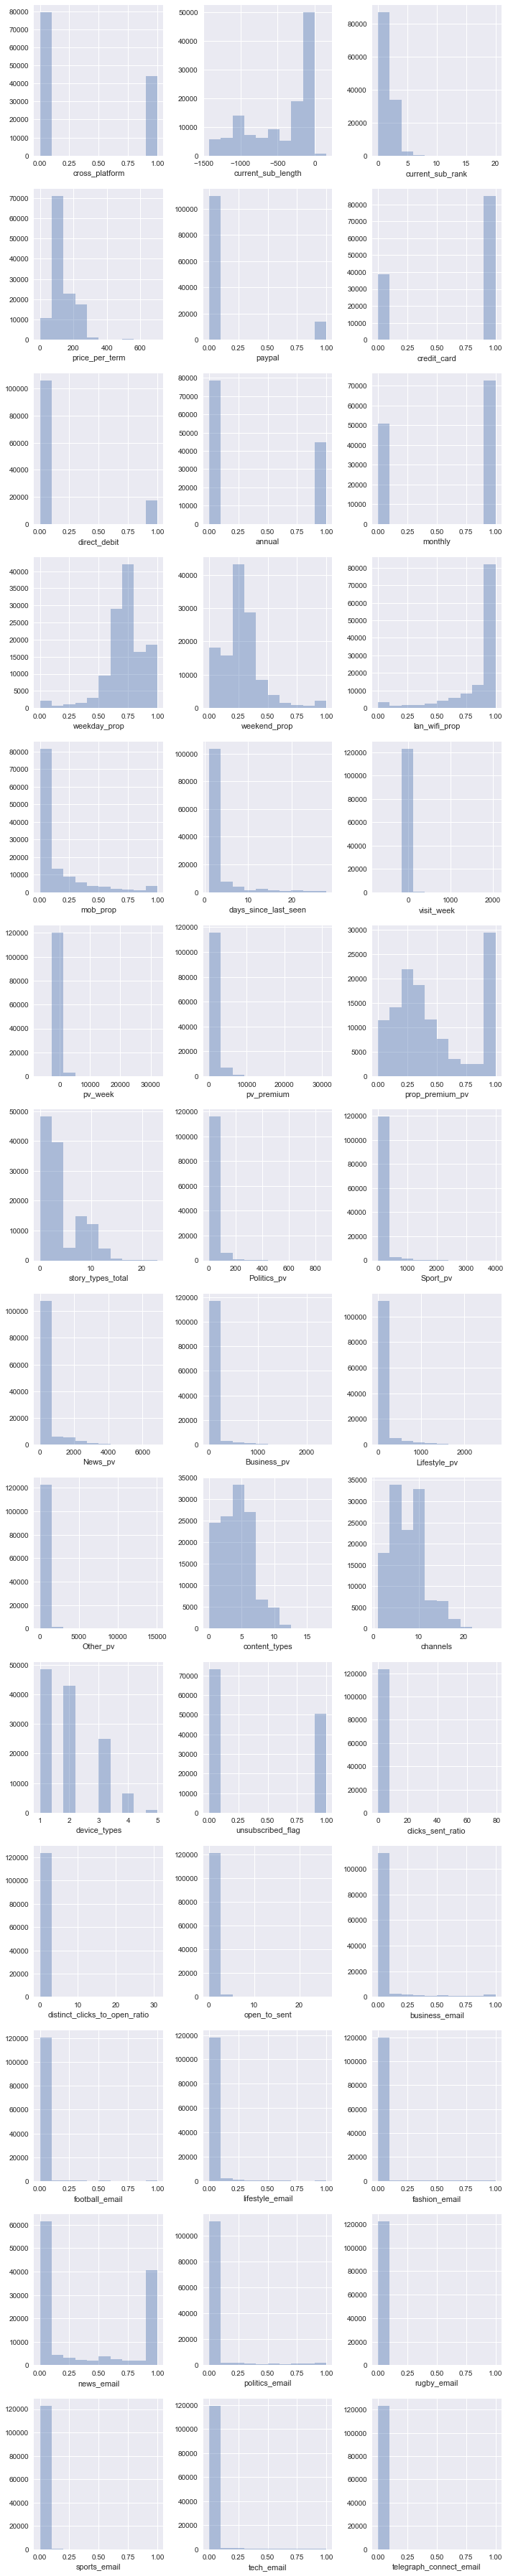

In [51]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(round(len(dat_num.columns) / 3), 3, figsize=(10,50))

for ax, col in zip(axes.flat, dat_num.columns):
    sns.distplot(dat_num[col], bins=10, kde=False, ax=ax)
plt.tight_layout()
plt.show()

## Correlation

Correlated variables ordered in their covariance.

In [52]:
corr_matrix = dat_num.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol

weekday_prop                   weekend_prop                     1.000000
lan_wifi_prop                  mob_prop                         1.000000
pv_premium                     News_pv                          0.961416
                               Lifestyle_pv                     0.912306
annual                         monthly                          0.903233
News_pv                        Lifestyle_pv                     0.884316
pv_premium                     Business_pv                      0.792533
pv_week                        pv_premium                       0.779400
pv_premium                     Other_pv                         0.774602
prop_premium_pv                story_types_total                0.758681
pv_week                        News_pv                          0.742951
unsubscribed_flag              news_email                       0.741991
News_pv                        Business_pv                      0.729245
Business_pv                    Lifestyle_pv        

## PCA data reduction

As there were plenty of variables heavily correlated with one another and too many variables to use in a segmentation, reducing the dimensionaltiy of the dataset through PCA was decided upon. 80% of the variance explained from the original data set was decided as a threshold and it came to 21 components which seemed a more reasonable set of inputs. <br/>
Function to provide principal component scores and loadings. 

In [53]:
def pca_loadings(dataframe):
    x = dataframe.copy()

    pca_col = list(x.columns.copy())

    scaler = StandardScaler().fit(x[pca_col])
    df_scaled = pd.DataFrame(scaler.transform(x[pca_col]))

    #for merging together position and name index
    df_scaled.reset_index(drop=True, inplace=True)

    pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
    pca.fit(df_scaled)
    pcscores = pd.DataFrame(pca.transform(df_scaled))
    pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
    loadings = pd.DataFrame(pca.components_, columns=pca_col)
    loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

    var=pca.explained_variance_ratio_
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    
    return {'pc_scores':pcscores, 'loadings':loadings, 'variance':var1}

### Cumulative percentage of varaince explained with each addition of principal component

In [54]:
dat_pca = pca_loadings(dat_num)

Total variance score for each component %  
       PC
1   16.45
2   24.29
3   29.60
4   34.75
5   39.44
6   43.83
7   47.38
8   50.58
9   53.54
10  56.31
11  58.99
12  61.49
13  63.92
14  66.31
15  68.65
16  70.97
17  73.27
18  75.54
19  77.77
20  79.96
21  82.13


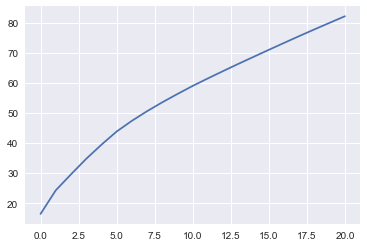

In [55]:
index = range(len(dat_pca['variance'])+1)[1:len(dat_pca['variance'])+1]
pc = pd.DataFrame({'PC':pd.Series(dat_pca['variance'],index=index)})
print("Total variance score for each component %  ")
print(pc)
plt.plot(dat_pca['variance'])

### Loadings of Components

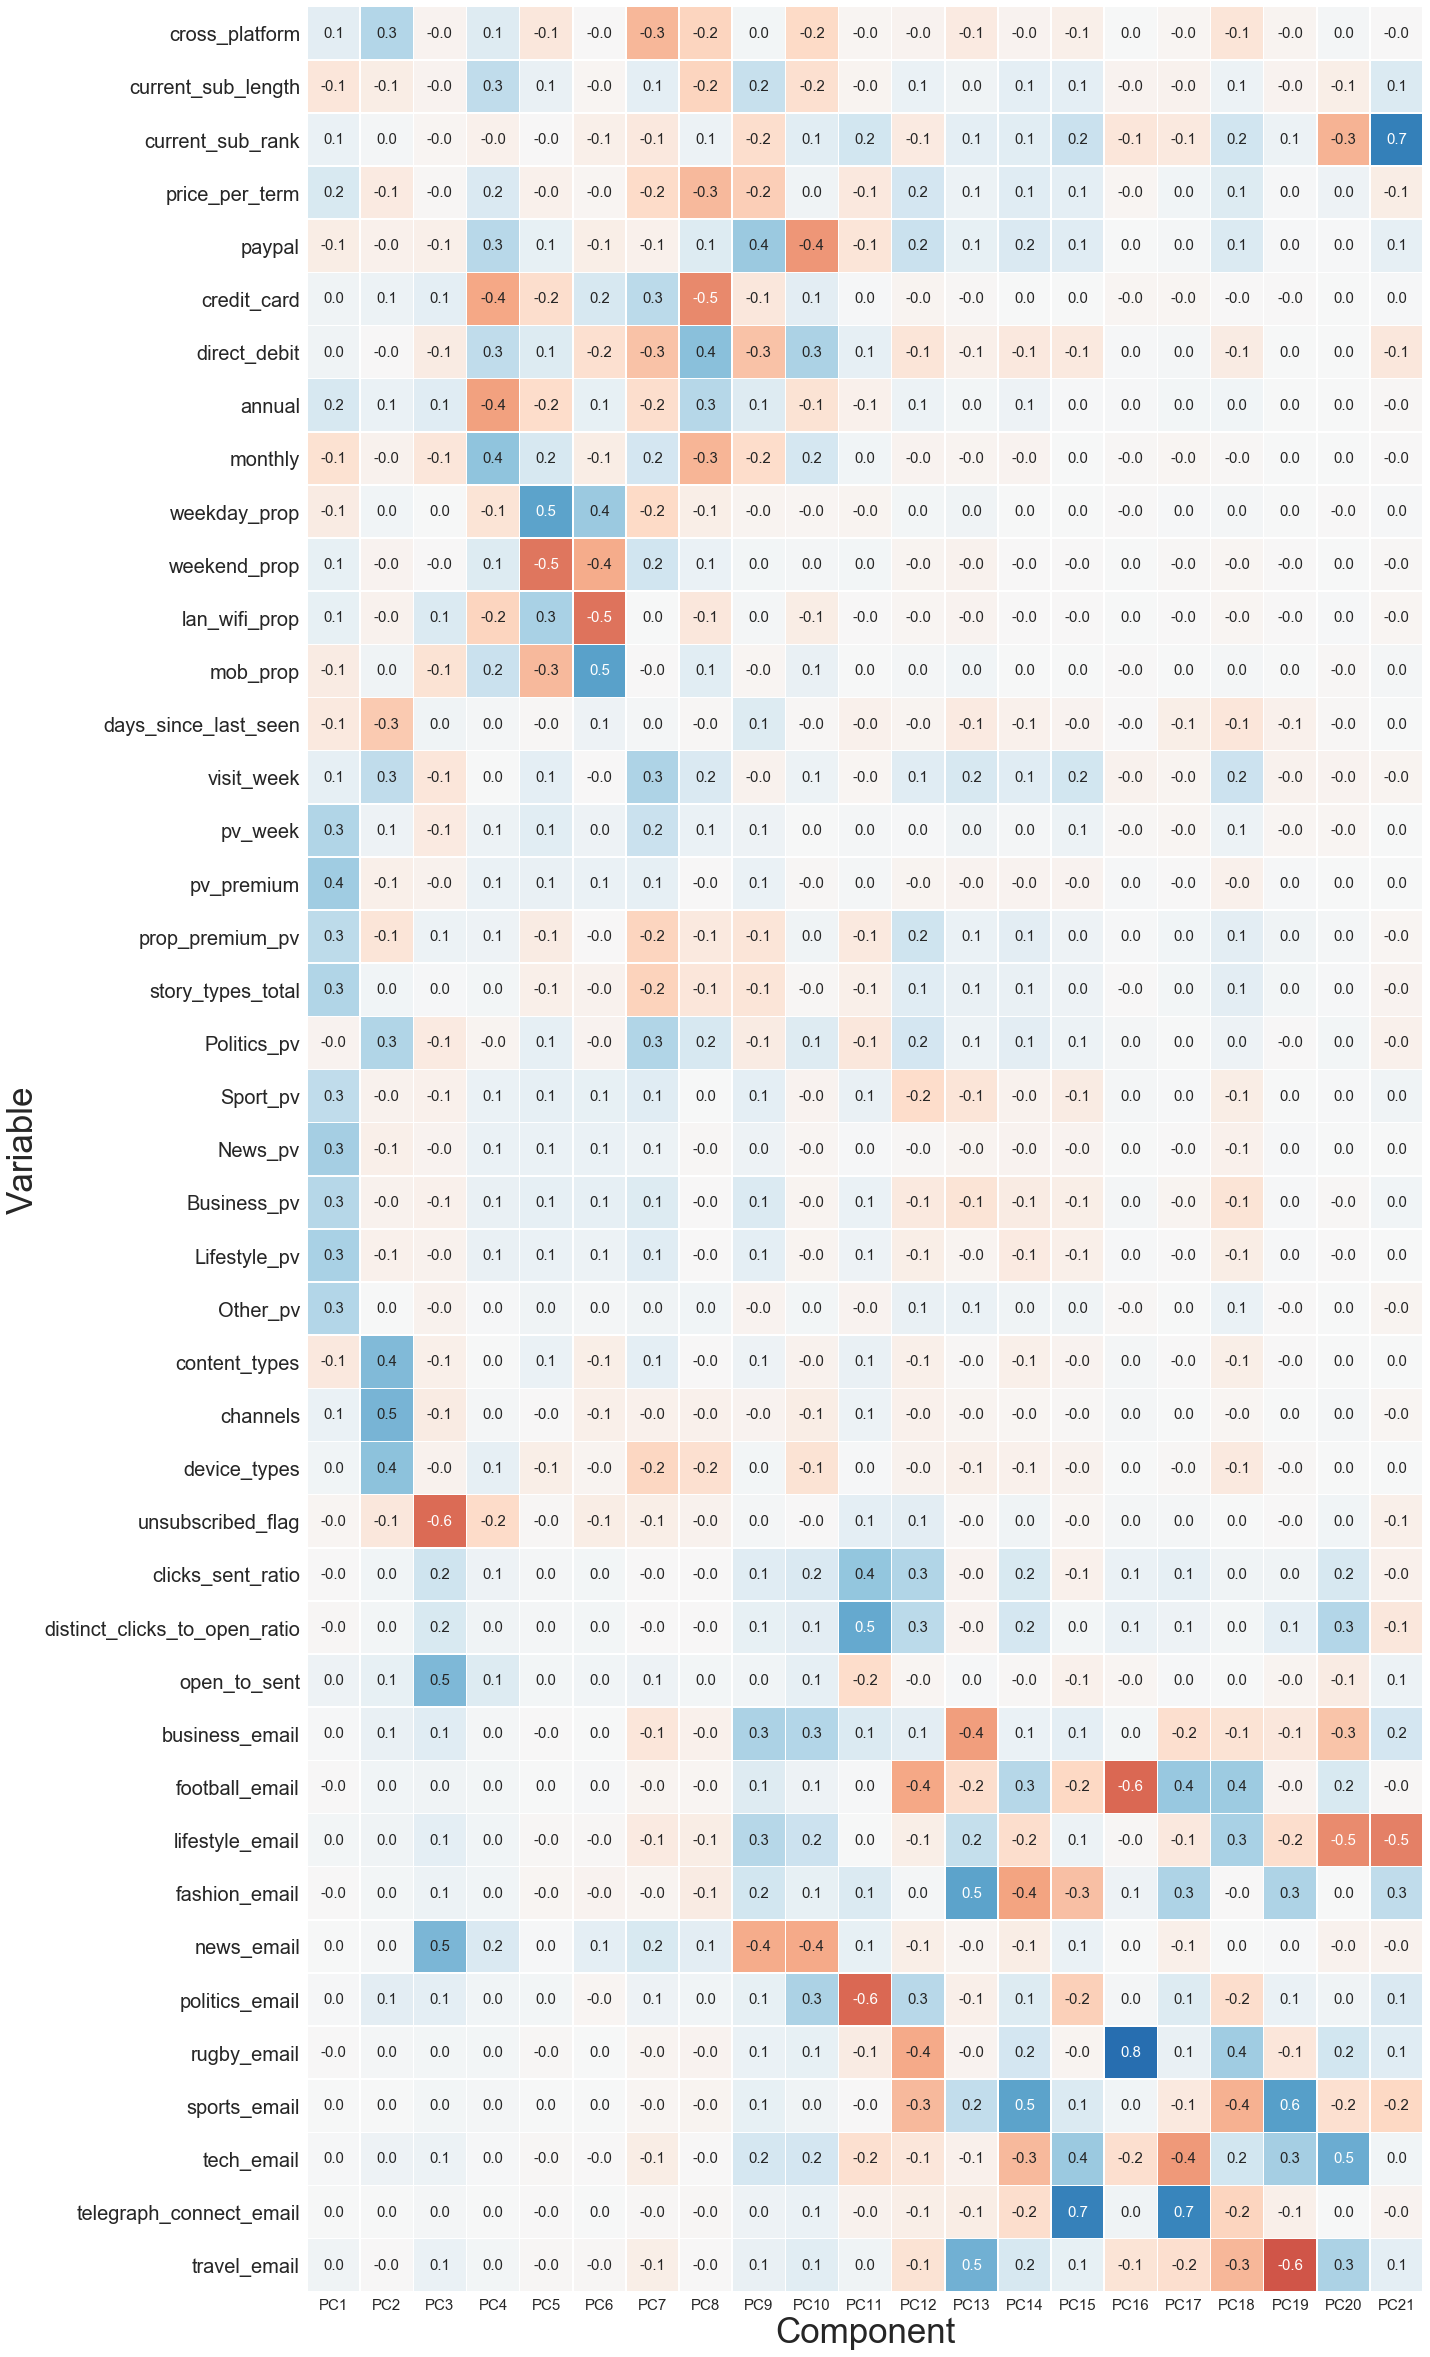

In [56]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,100))
ax = sns.heatmap(dat_pca['loadings'].transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True, ax=ax, fmt=".1f",
                annot_kws={'size':15},
                cbar=False,
                square=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=15)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=20)

plt.xlabel('Component', fontsize=35)
plt.ylabel('Variable', fontsize=35)
plt.show();

## Segmentation

In [57]:
from sklearn.cluster import KMeans

x = dat_num.copy()

pca_col = list(x.columns)

scaler = StandardScaler().fit(x[pca_col])
df_scaled = pd.DataFrame(scaler.transform(x[pca_col]))

#for merging together position and name index
df_scaled.reset_index(drop=True, inplace=True)

pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
pca.fit(df_scaled)

pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

seg_pca = pcscores #all components for 80% variance
#seg_pca = pcscores.iloc[:,:n] # select the first n components

### Run Kmeans for K = 1 to 15

remove (#) from lines in the cell below to run segmentation for K in the range 1 to 15. This will produce Within cluster sum of squares that can be plotted to find the number of clusters based on the elbow method. 

In [58]:
#import time
#t1 = time.clock()
#Sum_of_squared_distances = []
#K = range(1,15)
#for k in K:
#    km = KMeans(n_clusters=k, random_state=123, init='k-means++', n_init=50)
#    km = km.fit(seg_pca)
#    Sum_of_squared_distances.append(km.inertia_)
#t2 = time.clock()
#print('time elapsed:', t2 -t1)
#Sum_of_squared_distances

In [59]:
#plt.plot(K, Sum_of_squared_distances, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')
#plt.title('Elbow Method for optimal k')
#plt.show()

Running the Kmeans for range of K Values resulted in the optimum number (based on the Elbow method) at approximately 5 clusters but after consultation it was felt that a greater number was required from a marketing point of view for their plans on targetting customers. As a result of the dscussions the number of 7 was chosen. From analysis during this phase of work it could be seen that the size of each cluster was still useful and at K=7 there wasn't 1 particular cluster that was too small that made it redundant. 

### Run segmentation with chosen K

Change k below to change the number of segments

In [60]:
k = 7

In [61]:
km = KMeans(n_clusters=k,  random_state=123, init='k-means++', n_init=50)
km = km.fit(seg_pca)
seg_pca['labels'] = km.predict(seg_pca)

Size of segments

In [62]:
seg_pca.labels.value_counts()

4    33634
0    24349
3    21761
1    19524
6    10380
2     7575
5     6364
Name: labels, dtype: int64

% split of each segment

In [63]:
round(seg_pca.labels.value_counts()/len(seg_pca),2)

4    0.27
0    0.20
3    0.18
1    0.16
6    0.08
2    0.06
5    0.05
Name: labels, dtype: float64

### Assign labels to original dataset and write to csv

Change title of csv file if changing the number of segments (k)

In [ ]:
dat['seg_label'] = seg_pca['labels']
dat.to_csv('segmented_data_seven.csv')

From this file a new notebook was created that looked to map a decision tree to the data above with the segments. This is also contained in the repository.